The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


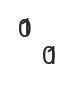

In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
f,a = plt.subplots(1,1,figsize=(1e-2, 1e-2))
mpl.rcParams['figure.dpi'] = 180
sns.set_style('darkgrid')
import os,sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import warnings
warnings.filterwarnings("ignore")
import torch
from torch import nn
import torch.nn.functional as F
import glob
# Here you import other functions and classes
from src.utils import mkdirs, convert_path, pkl_dump, pkl_load, display_side, add_median_labels, get_palette
from src.data_processing import encode_batch, AA_KEYS, BL62_VALUES, BL62FREQ_VALUES, HLAS, BL50, BL50_VALUES
from src.models import NNAlignEFSinglePass
from src.datasets import NNAlignDatasetEFSinglePass

In [3]:
df = pd.read_csv('../data/mhc1_el_sub10k/sample_no_u.csv')

In [36]:
df200 = pd.read_csv('../data/mhc1_el_subsample/mhc1_el_200k_subsample.csv')
df200['len'] = df200['sequence'].apply(len)
df500 = pd.read_csv('../data/mhc1_el_subsample/mhc1_el_500k_subsample.csv')
df500['len'] = df500['sequence'].apply(len)

df200['flag'] = df200.apply(lambda x: any([z not in AA_KEYS for z in x['sequence']]), axis=1)
df500['flag'] = df500.apply(lambda x: any([z not in AA_KEYS for z in x['sequence']]), axis=1)

In [38]:
df500.query('not flag')
df200.query('not flag')

,sequence,target,HLA,pseudoseq,fold,len,flag
0,VAQYLSLPTVFF,0.0,HLA-B27:01,SPIVAQVFFLHA,0,12,False
1,FYAILTPMLN,0.0,HLA-C07:02,FSVFYAMLNPMI,0,10,False
2,HTFSTEIAKFLK,1.0,HLA-A03:01,KFHHTFFLKVSQ,0,12,False
3,APRTQDAG,0.0,HLA-A24:02,SSSAPRDAGIAS,0,8,False
4,RCSTAIATGLKN,0.0,HLA-C08:02,TGPRCSLKNQKP,0,12,False
...,...,...,...,...,...,...,...
499995,EVLKNSEII,0.0,HLA-B57:01,KSQEVLEIINWK,4,9,False
499996,YARQGQIEV,1.0,HLA-C02:02,HPSYARIEVSIL,4,9,False
499997,SRVLNASTLAL,0.0,HLA-C07:01,PELSRVLALALA,4,11,False
499998,QQAAFLMSIL,0.0,HLA-B27:05,VSHQQASILGVI,4,10,False


,sequence,target,HLA,pseudoseq,fold,len,flag
0,VAQYLSLPTVFF,0.0,HLA-B27:01,SPIVAQVFFLHA,0,12,False
1,FYAILTPMLN,0.0,HLA-C07:02,FSVFYAMLNPMI,0,10,False
2,HTFSTEIAKFLK,1.0,HLA-A03:01,KFHHTFFLKVSQ,0,12,False
3,APRTQDAG,0.0,HLA-A24:02,SSSAPRDAGIAS,0,8,False
4,RCSTAIATGLKN,0.0,HLA-C08:02,TGPRCSLKNQKP,0,12,False
...,...,...,...,...,...,...,...
199995,TLGPDLHLLNPAA,0.0,HLA-A02:01,QMLTLGPAAGMT,4,13,False
199996,MIRFSGTTGQM,0.0,HLA-C03:03,VYGMIRGQMSDL,4,11,False
199997,ERFDTWPC,0.0,HLA-A29:02,NNPERFWPCILG,4,8,False
199998,LLVFLLDGF,0.0,HLA-C03:03,RRKLLVDGFRSD,4,9,False
